In [44]:
# Import Data Liabraries
import numpy as np
import pandas as pd
# # Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Filter Warning Library
import warnings
warnings.simplefilter('ignore')

In [45]:
# Import Dataset using Pandas library
data = pd.read_csv('C:\EnE-HearDiesese_ClassificationModel\data\\raw\heart-disease.csv')
df = data.sample(frac=1)   # Shuffule Dataset
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


In [46]:
df.shape  # This Dataset Contains total 303 Rows and 14 Columns

(303, 14)

In [47]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
df.info()   # No Null Value Present in the given dataset also no categorical data found.

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 203 to 213
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


Information About The Dataset https://archive.ics.uci.edu/ml/datasets/heart+disease

sex - 1- male and 0 female

cp: chest pain type -- Value 0: typical angina -- Value 1: atypical angina -- Value 2: non-anginal pain -- Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

ca: number of major vessels (0-3) colored by flourosopy

slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

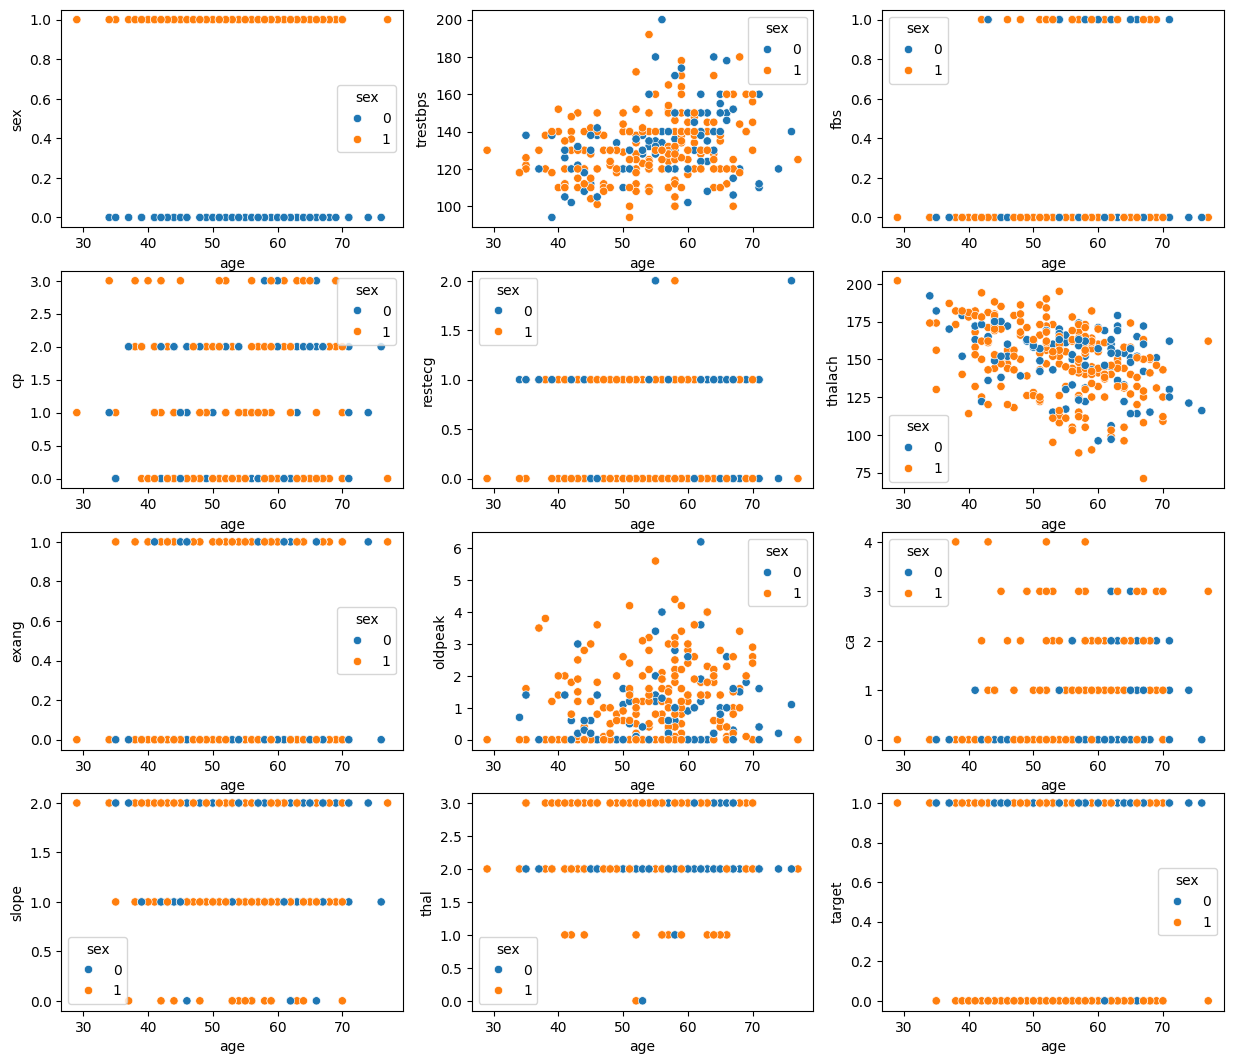

In [49]:
fig,ax = plt.subplots(4,3,figsize = (15,13),facecolor = 'white')
sns.scatterplot(ax = ax [0][0],x = df.age, y = df.sex, hue = df.sex)
sns.scatterplot(ax = ax [0][1],x = df.age, y = df.trestbps, hue = df.sex)
sns.scatterplot(ax = ax [0][2],x = df.age, y = df.fbs, hue = df.sex)
sns.scatterplot(ax = ax [1][0],x = df.age, y = df.cp, hue = df.sex)
sns.scatterplot(ax = ax [1][1],x = df.age, y = df.restecg, hue = df.sex)
sns.scatterplot(ax = ax [1][2],x = df.age, y = df.thalach, hue = df.sex)
sns.scatterplot(ax = ax [2][0],x = df.age, y = df.exang, hue = df.sex)
sns.scatterplot(ax = ax [2][1],x = df.age, y = df.oldpeak, hue = df.sex)
sns.scatterplot(ax = ax [2][2],x = df.age, y = df.ca, hue = df.sex)
sns.scatterplot(ax = ax [3][0],x = df.age, y = df.slope, hue = df.sex)
sns.scatterplot(ax = ax [3][1],x = df.age, y = df.thal, hue = df.sex)
sns.scatterplot(ax = ax [3][2],x = df.age, y = df.target, hue = df.sex)
plt.show()

In [50]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [51]:
feature = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
for col in feature:
    print(f'Feature : {col}')
    print(feature[col].value_counts())
    print('------------------')

Feature : age
age
58    19
57    17
54    16
59    14
52    13
51    12
56    11
62    11
44    11
60    11
41    10
64    10
67     9
63     9
65     8
55     8
45     8
43     8
61     8
42     8
53     8
46     7
50     7
48     7
66     7
47     5
49     5
39     4
68     4
35     4
70     4
38     3
69     3
40     3
71     3
37     2
34     2
29     1
77     1
76     1
74     1
Name: count, dtype: int64
------------------
Feature : sex
sex
1    207
0     96
Name: count, dtype: int64
------------------
Feature : cp
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
------------------
Feature : trestbps
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
124     6
135     6
108     6
145     5
134     5
152     5
100     4
170     4
122     4
126     3
105     3
136     3
180     3
115     3
142     3
144     2
148     2
146     2
102     2
178     2
94      2
129     1
156     1
101     1
10

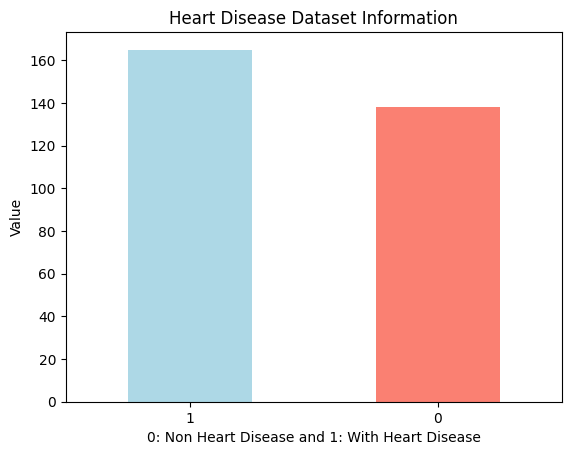

In [52]:
df.target.value_counts().plot(kind = 'bar',color = ['lightblue','salmon'])
plt.title('Heart Disease Dataset Information')
plt.xlabel('0: Non Heart Disease and 1: With Heart Disease')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

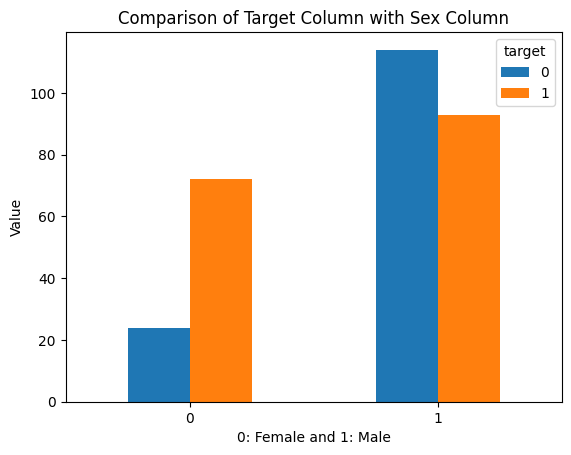

In [53]:
# Comparison of Target Column with Sex Column
pd.crosstab(df.sex,df.target).plot(kind = 'bar')
plt.title('Comparison of Target Column with Sex Column')
plt.xlabel('0: Female and 1: Male')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

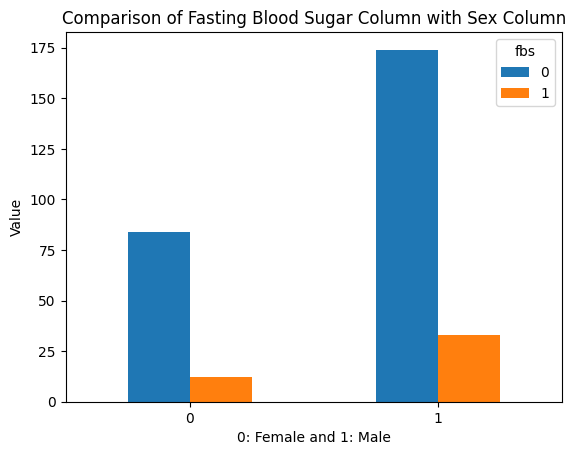

In [54]:
# Comparison of Fasting Blood Sugar Column with Sex Column
pd.crosstab(df.sex,df.fbs).plot(kind = 'bar')
plt.title('Comparison of Fasting Blood Sugar Column with Sex Column')
plt.xlabel('0: Female and 1: Male')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

Observations From The Above Dataset 
Maximum People having 40+ Age
The Dataset Contains 207 Males and 96 Females
Out of 303 Dataset, 93 Males and 72 Females Found Heart Disease, whereas 114 Males and 24 Females not found Heart Disease.
out of 303 Dataset, 33 Males and 12 Females having sugar level more than 120 mg/dl, where as 174 Males and 84 Females having sugar level less than 120 mg/dl
Maximum i.e. 143 Patients having typical angina, 50 Patients with atypical angina, 87: Patients with non-anginal pain and 23 Patients asymptomatic
Maximum Heart Rate is found between age group of 35 to 55.
The Dataset Shows 165 as Heart Disease and Non Heart Disease Patients are 138.
75% Females and 44.92% Males found Heart Disease - Average : 59.96% Heart Disease Patients.


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


[]

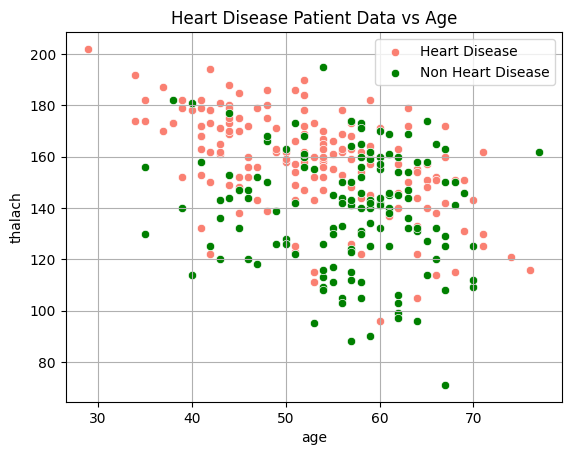

In [56]:
# Data Visualization for Heart Disease Patient Data vs Age
sns.scatterplot(x = df.age[df.target==1], y = df.thalach[df.target==1],color='salmon')
sns.scatterplot(x = df.age[df.target==0], y = df.thalach[df.target==0],color='green')
plt.title('Heart Disease Patient Data vs Age')
plt.legend(['Heart Disease','Non Heart Disease'])
plt.grid()
plt.plot()

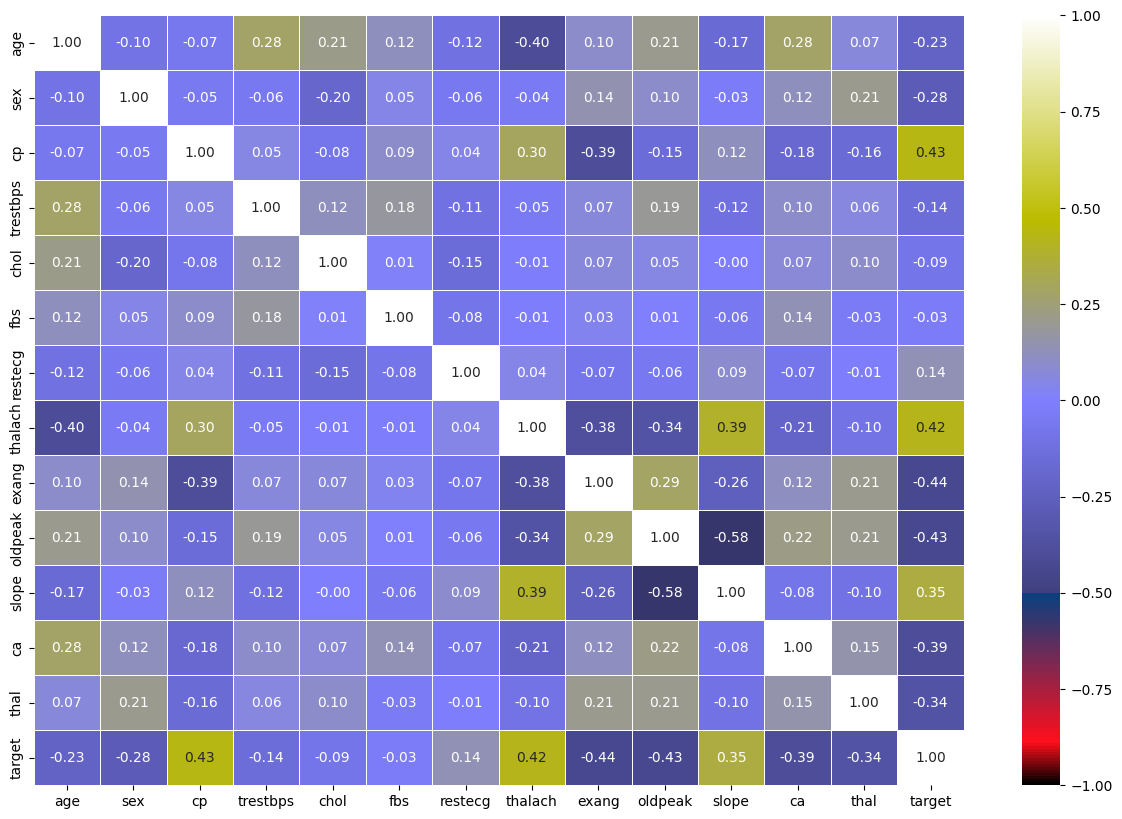

In [57]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='gist_stern',center=0,vmax=1,vmin=-1,linewidths=0.5,fmt='0.2f')
plt.show()

 ## Data Split into X and y ##
 

In [58]:
X = df.drop('target',axis=1)
y = df['target']

In [59]:
# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,precision_score,confusion_matrix,classification_report


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [60]:
# Import Sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'KNNClassifier':KNeighborsClassifier()}

def evaluate(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    # Creating One Dictionary to Save Model Score
    model_score = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [61]:
model_score = evaluate(models = models ,X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test)
model_score

{'LogisticRegression': 0.8681318681318682,
 'RandomForestClassifier': 0.8571428571428571,
 'KNNClassifier': 0.5934065934065934}

In [62]:
# Step 3 : Balance Technique

from imblearn.over_sampling import SMOTE

# Create SMOTE object
sm = SMOTE()

# Apply SMOTE to balance the training data
X_train, y_train = sm.fit_resample(X_train, y_train)

# Check the distribution of classes after balancing
print(y_train.value_counts())



target
0    111
1    111
Name: count, dtype: int64


In [63]:
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [64]:
# Model Comparison

model_comparison = pd.DataFrame(model_score,index = ['Accuracy'])
model_comparison.sort_values(by = 'Accuracy',axis = 1,ascending= False)

,LogisticRegression,RandomForestClassifier,KNNClassifier
Accuracy,0.868132,0.857143,0.593407


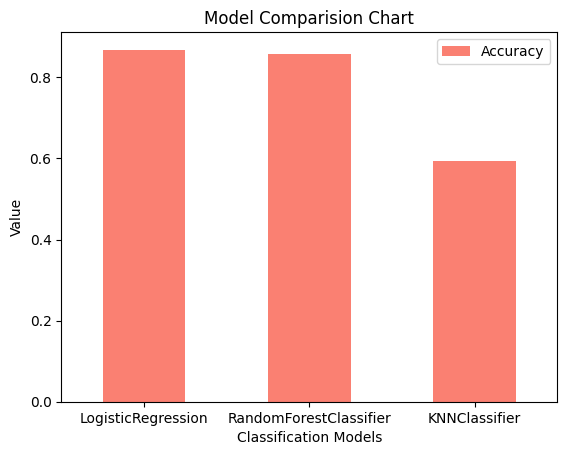

In [65]:
# Model Comparison Graphical Representation

model_comparison.T.plot(kind = 'bar',color = 'salmon')
plt.title('Model Comparision Chart')
plt.xlabel('Classification Models')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

### Hyper Parameter Tuning ###
### Hyper Parameter Tuning Manually ###

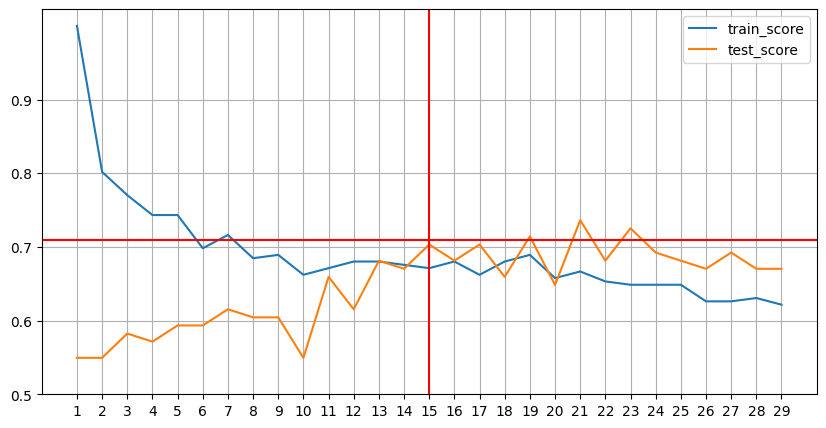

In [66]:
# Tunning KNN Model

train_score = []
test_score = []

# Create a list of different values of n_neighbours
neighbors = range(1,30)

# Setting KNN
Knn = KNeighborsClassifier()

# Loop Calcualtions
for i in neighbors:
    Knn.set_params(n_neighbors = i)
    Knn.fit(X_train,y_train)
    
    train_score.append(Knn.score(X_train,y_train))
    test_score.append(Knn.score(X_test,y_test))
plt.subplots(figsize = (10,5))    
plt.plot(neighbors,train_score)
plt.plot(neighbors,test_score)
plt.xticks(np.arange(1,30,1))
plt.yticks(np.arange(0.5,1,0.1))
plt.axhline(0.71,c = 'r')
plt.axvline(15,c = 'r')
plt.legend(['train_score','test_score'])
plt.grid()
plt.show()


Hyper Parameter Tuning with RandomizedSearchCV

In [67]:
rf = RandomForestClassifier()
rf.get_params()   # Checking Various Parameters for RandomForestClassifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
rf_grid = { 'n_estimators': np.arange(10,1000,50),
            'max_depth': [None,3,5,10],
            'min_samples_leaf': np.arange(2,20,2),
            'min_samples_split': np.arange(1,20,2)
           }

np.random.seed(42)

randomforest = RandomizedSearchCV(RandomForestClassifier(),param_distributions = rf_grid,cv =5, n_iter = 20,verbose= True)
randomforest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [69]:
randomforest.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(3),
 'min_samples_leaf': np.int64(10),
 'max_depth': 5}

In [70]:
randomforest.score(X_test,y_test)

0.8901098901098901

In [71]:
print(f'The Model Score using RandomForestClassifier is {randomforest.score(X_test,y_test)*100:.2f} %')

The Model Score using RandomForestClassifier is 89.01 %


In [72]:
y_pred = randomforest.predict(X_test)
plot_roc_curve(randomforest,X_test,y_test)
plt.show()

NameError: name 'plot_roc_curve' is not defined

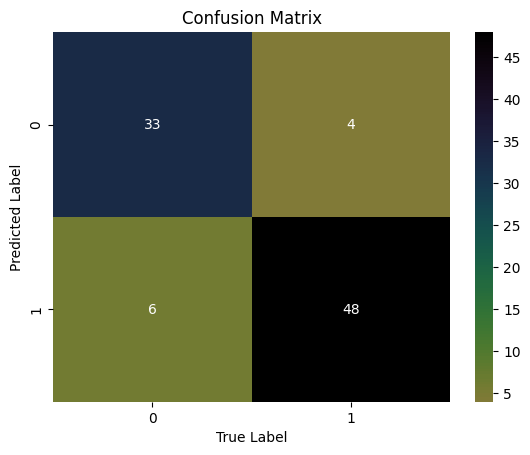

In [73]:

# Building Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='cubehelix_r',center=0)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


In [74]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.92      0.89      0.91        54

    accuracy                           0.89        91
   macro avg       0.88      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



In [75]:
cv_acc = cross_val_score(randomforest,X,y,cv = 5,scoring = 'accuracy')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
print(f'CV Accuracy Score : {np.mean(cv_acc)*100:.2f} %')

In [ ]:
cv_prec = cross_val_score(randomforest,X,y,cv = 5,scoring = 'precision')

In [ ]:
print(f'CV Precision Score : {np.mean(cv_prec)*100:.2f} %')

In [ ]:
cv_recall = cross_val_score(randomforest,X,y,cv = 5,scoring = 'recall')

In [ ]:
print(f'CV Recall Score : {np.mean(cv_recall)*100:.2f} %')

In [ ]:
print(f'CV F1 Score : {np.mean(cv_f1)*100:.2f} %')

In [ ]:
CrossvalidationData = pd.DataFrame({'Accuracy':np.mean(cv_acc),
                                    'Precision':np.mean(cv_prec),
                                    'Recall':np.mean(cv_recall),
                                    'F1 Score':np.mean(cv_f1)
                                     },index = [0])
CrossvalidationData.T.plot(kind='bar',color = 'lightblue')
plt.xticks(rotation=0)
plt.show()
